<div style="text-align: center;">
    <h2 style="color: #007BFF;">DEP Task 1 EDA on Retail Sales Data</h2>
</div>


<div style="text-align: center;">
   <h2 style="color: #007BFF;">My Introduction</h2>
</div>

👋 Greetings, all! I'm Zeeshan Ahmad, an aspiring data enthusiast with a keen interest in exploring machine learning techniques. I am thrilled to share my analysis and insights from a comprehensive shopping dataset from Istanbul.  Explore this fascinating dataset with me and discover intriguing shopping trends and patterns!


<div style="text-align: left;">
   <h2 style="color: #007BFF;">Connect with Me</h2>
</div>
<div style="text-align: center; margin-top: 20px; margin-bottom: 20px;">
    <a href="https://www.linkedin.com/in/zeeshan--ahmed" rel="noreferrer nofollow" style="margin: 0px 10px;">
        <img src="https://img.shields.io/badge/LinkedIn-Profile-blue?style=for-the-badge&logo=linkedin" alt="LinkedIn">
    </a>
    <br>
    <a href="https://www.kaggle.com/zeeshanahmad124586" rel="noreferrer nofollow" style="margin: 0px 10px;">
        <img src="https://img.shields.io/badge/Kaggle-Profile-blue?style=for-the-badge&logo=kaggle" alt="Kaggle">
    </a>
    <br>
    <a href="https://github.com/zeeshanAhmed2798" rel="noreferrer nofollow" style="margin: 0px 10px;">
        <img src="https://img.shields.io/badge/GitHub-Profile-blue?style=for-the-badge&logo=github" alt="GitHub">
    </a>
</div>


<div style="text-align: left;">
    <h3 style="color: #007BFF;">Data Description</h3>
</div>
The dataset includes shopping information from 10 Istanbul malls between 2021-2023, detailing invoice numbers, customer demographics, payment methods, product categories, quantities, prices, and shopping mall locations. It's ideal for analyzing shopping trends and patterns across various age groups and genders.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#import 
ShoppingDf=pd.read_csv("path")

In [3]:
ShoppingDf.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


<div style="text-align: left;">
    <h3 style="color: #007BFF;">Assessing Data Manually & Programmatically </h3>
</div>

**Content Attribute Information**

- invoice_no: Unique invoice identifier (I + 6-digit integer).
- customer_id: Unique customer identifier (C + 6-digit integer).
- gender: Customer's gender.
- age: Customer's age (positive integer).
- category: Product category.
- quantity: Number of items per transaction.
- price: Product unit price in Turkish Liras (TL).
- payment_method: Payment method (cash, credit card, or debit card).
- invoice_date: Date of transaction.
- shopping_mall: Name of the shopping mall.

In [4]:
ShoppingDf.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


In [5]:
ShoppingDf.tail()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,16/03/2021,Istinye Park
99456,I232867,C273973,Female,36,Souvenir,3,35.19,Credit Card,15/10/2022,Mall of Istanbul


In [6]:
ShoppingDf.sample(10)

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
357,I317354,C142943,Female,31,Clothing,1,300.08,Cash,10/11/2021,Metropol AVM
8191,I449958,C128686,Female,58,Clothing,1,300.08,Cash,3/4/2021,Kanyon
83048,I297285,C291809,Male,20,Food & Beverage,5,26.15,Credit Card,27/02/2023,Kanyon
82708,I127322,C521127,Female,67,Technology,2,2100.00,Cash,6/8/2021,Metrocity
53677,I269604,C129726,Female,36,Technology,1,1050.00,Debit Card,1/11/2021,Mall of Istanbul
86224,I153653,C270292,Male,23,Food & Beverage,5,26.15,Credit Card,24/06/2021,Istinye Park
62107,I370813,C112458,Female,45,Clothing,1,300.08,Cash,8/1/2021,Istinye Park
32789,I169225,C166524,Male,60,Books,4,60.60,Cash,3/10/2021,Forum Istanbul
44730,I530987,C170039,Male,66,Food & Beverage,5,26.15,Credit Card,6/11/2022,Zorlu Center
60298,I246051,C156664,Male,51,Technology,3,3150.00,Credit Card,27/12/2022,Cevahir AVM


In [7]:
ShoppingDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


- invoice_date should be in dateTime formate. 

In [8]:
ShoppingDf.isnull().sum()

invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
dtype: int64

In [9]:
ShoppingDf.duplicated().sum()

0

In [10]:
ShoppingDf.describe()

,age,quantity,price
count,99457.000000,99457.000000,99457.000000
mean,43.427089,3.003429,689.256321
std,14.990054,1.413025,941.184567
min,18.000000,1.000000,5.230000
25%,30.000000,2.000000,45.450000
50%,43.000000,3.000000,203.300000
75%,56.000000,4.000000,1200.320000
max,69.000000,5.000000,5250.000000


In [11]:
ShoppingDf.isna().sum()

invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
dtype: int64

- Univariate Analysis

In [12]:
ShoppingDf['invoice_no'].isna().sum()

0

In [13]:
ShoppingDf['invoice_no'].duplicated().sum()

0

In [14]:
ShoppingDf['customer_id'].isna().sum()

0

In [15]:
ShoppingDf['customer_id'].duplicated().sum()

0

In [16]:
ShoppingDf['gender'].isna().sum()

0

In [17]:
ShoppingDf['gender'].value_counts()


gender
Female    59482
Male      39975
Name: count, dtype: int64

In [18]:
ShoppingDf['age'].isna().sum()

0

<Axes: >

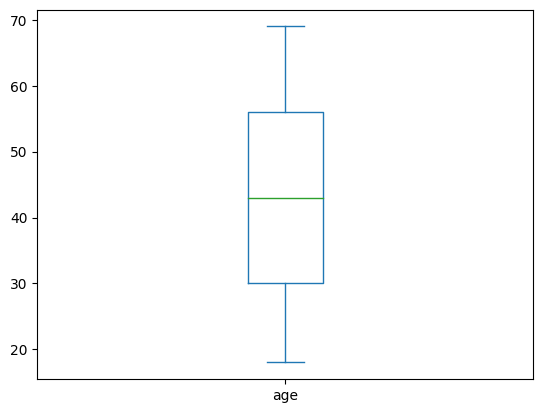

In [19]:
# for outliers
ShoppingDf['age'].plot(kind='box')

In [20]:
ShoppingDf['category'].isna().sum()

0

In [21]:
ShoppingDf['category'].value_counts()

category
Clothing           34487
Cosmetics          15097
Food & Beverage    14776
Toys               10087
Shoes              10034
Souvenir            4999
Technology          4996
Books               4981
Name: count, dtype: int64

In [22]:
ShoppingDf['quantity'].isna().sum()

0

<Axes: >

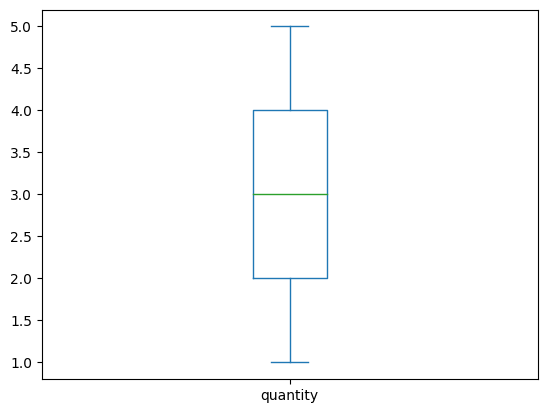

In [23]:
ShoppingDf['quantity'].plot(kind='box')

In [24]:
ShoppingDf['price'].isna().sum()

0

<Axes: >

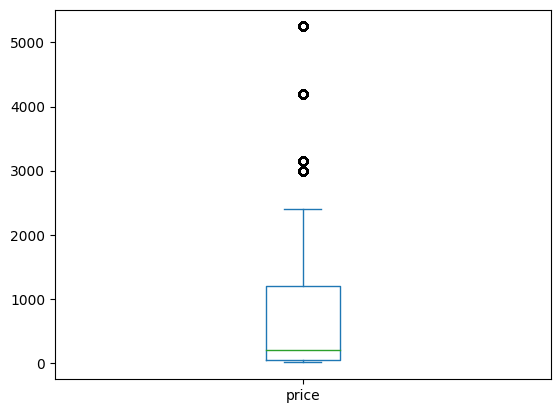

In [25]:
ShoppingDf['price'].plot(kind='box')

In [26]:
ShoppingDf[ShoppingDf['price']>5000].head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
23,I252275,C313348,Male,44,Technology,5,5250.0,Cash,26/10/2021,Kanyon
69,I883721,C236859,Female,44,Technology,5,5250.0,Credit Card,19/11/2021,Mall of Istanbul
363,I194017,C462011,Female,67,Technology,5,5250.0,Cash,3/1/2022,Kanyon
391,I252528,C333065,Male,47,Technology,5,5250.0,Debit Card,4/10/2022,Cevahir AVM
570,I311849,C178487,Male,27,Technology,5,5250.0,Debit Card,21/04/2021,Cevahir AVM


- Price looking normal

In [27]:
ShoppingDf['payment_method'].isna().sum()

0

In [28]:
ShoppingDf['payment_method'].value_counts()

payment_method
Cash           44447
Credit Card    34931
Debit Card     20079
Name: count, dtype: int64

In [29]:
ShoppingDf['invoice_date'].isna().sum()

0

In [30]:
ShoppingDf['shopping_mall'].isna().sum()

0

In [31]:
ShoppingDf['shopping_mall'].value_counts()

shopping_mall
Mall of Istanbul     19943
Kanyon               19823
Metrocity            15011
Metropol AVM         10161
Istinye Park          9781
Zorlu Center          5075
Cevahir AVM           4991
Forum Istanbul        4947
Viaport Outlet        4914
Emaar Square Mall     4811
Name: count, dtype: int64

## Issue with data
- invoice_date: Convert to Date and Time
- There must be columns for Year, Day, and Month
- No missing Value in Dataset
- No outliers in Dataset

## Cleaning

- Before cleaning make sure to copy your dataset.

In [32]:
Shopping=ShoppingDf.copy()

In [33]:
Shopping['invoice_date']=pd.to_datetime(Shopping['invoice_date'], format='%d/%m/%Y')

In [34]:
Shopping['Year']=Shopping['invoice_date'].dt.year

In [35]:
Shopping['Month']=Shopping['invoice_date'].dt.strftime('%b')

In [36]:
Shopping['Day']=Shopping['invoice_date'].dt.day_name()

## EDA

<div style="text-align: center;">
    <h2 style="color: #007BFF;">Univariate analysis</h2>
</div>


- Gender

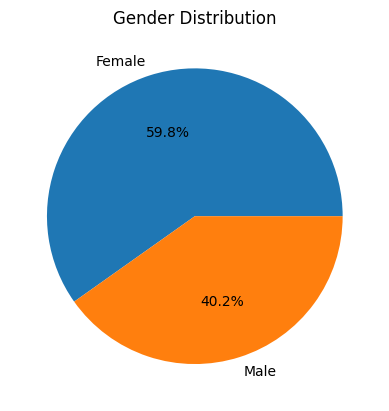

In [37]:
Shopping['gender'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.ylabel('') 
plt.title('Gender Distribution')
plt.show()


- Age

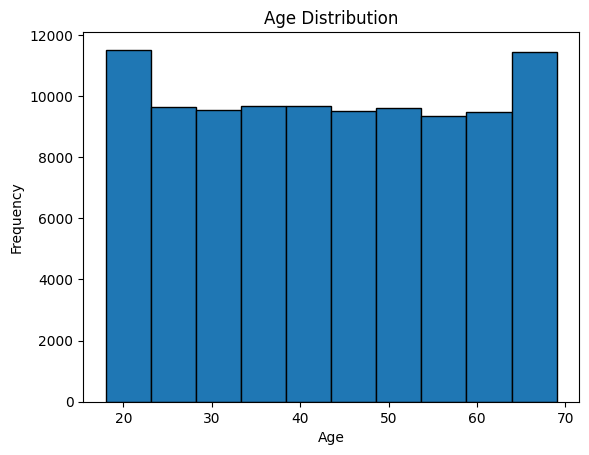

In [38]:
Shopping['age'].plot(kind='hist', bins=10, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()


- category

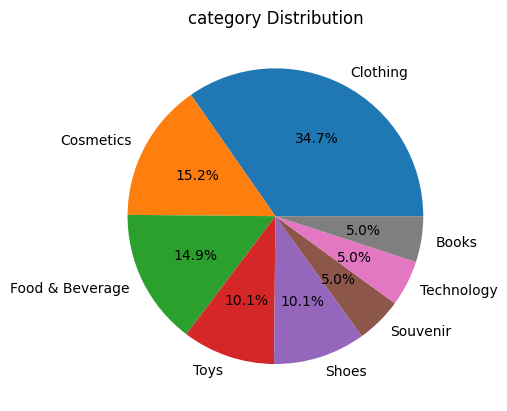

In [39]:
Shopping['category'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.ylabel('') 
plt.title('category Distribution')
plt.show()

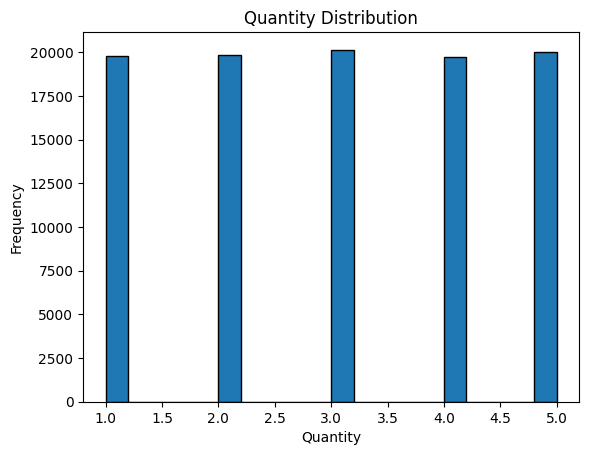

In [40]:
Shopping['quantity'].plot(kind='hist', bins=20, edgecolor='black')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.title('Quantity Distribution')
plt.show()


- payment_method

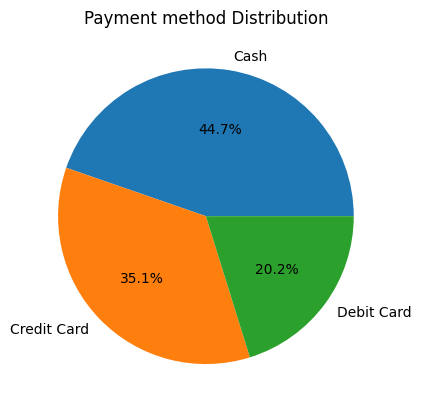

In [41]:
Shopping['payment_method'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.ylabel('') 
plt.title('Payment method Distribution')
plt.show()

- shopping_mall

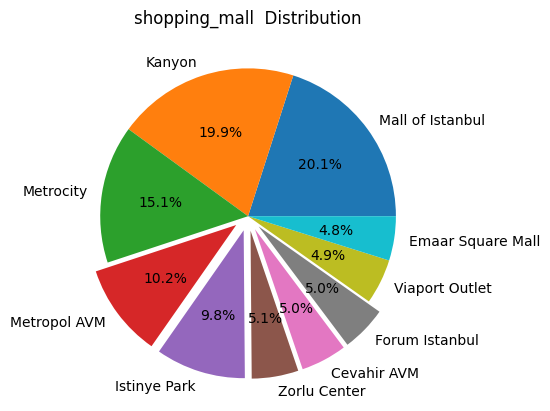

In [42]:
Shopping['shopping_mall'].value_counts().plot(kind='pie', autopct='%1.1f%%',explode=[0,0,0,0.1,0.1,0.1,0.1,0.1,0,0])
plt.ylabel('') 
plt.title('shopping_mall  Distribution')
plt.show()

<div style="text-align: center;">
    <h2 style="color: #007BFF;">Bivariate analysis</h2>
</div>


- gender and category: 

In [43]:
crosstab=pd.crosstab(Shopping['gender'], Shopping['category'])

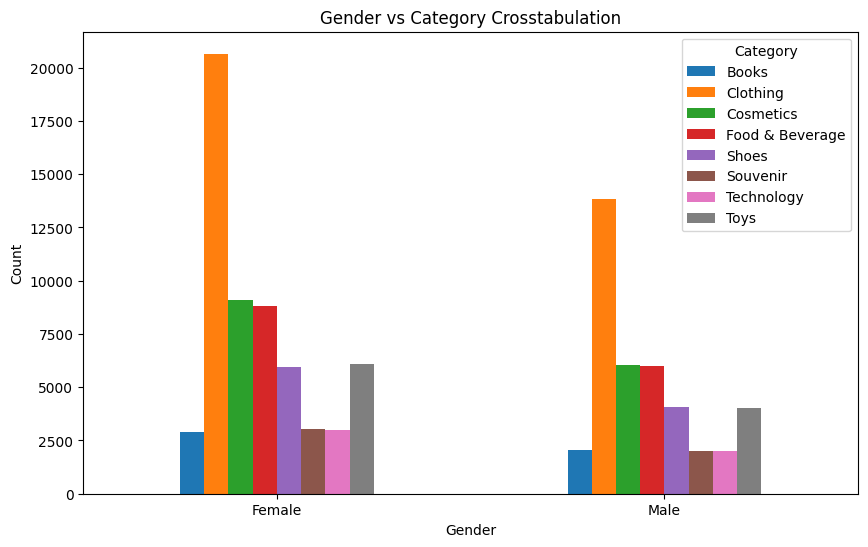

In [44]:
crosstab.plot(kind='bar', figsize=(10, 6))
plt.title('Gender vs Category Crosstabulation')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Category')
plt.show()

We can easily observe that clothing demand is high.

- Quantity and Age

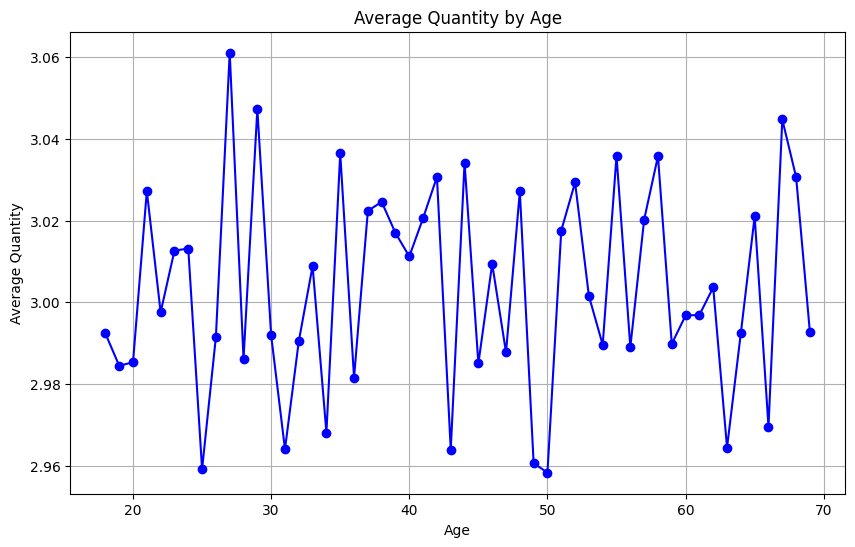

In [45]:
age_grouped = Shopping.groupby('age')['quantity'].mean().reset_index()
plt.figure(figsize=(10, 6))
plt.plot(age_grouped['age'], age_grouped['quantity'], marker='o', linestyle='-', color='b')
plt.title('Average Quantity by Age')
plt.xlabel('Age')
plt.ylabel('Average Quantity')
plt.grid(True)
plt.show()

- Price Quantity by Age

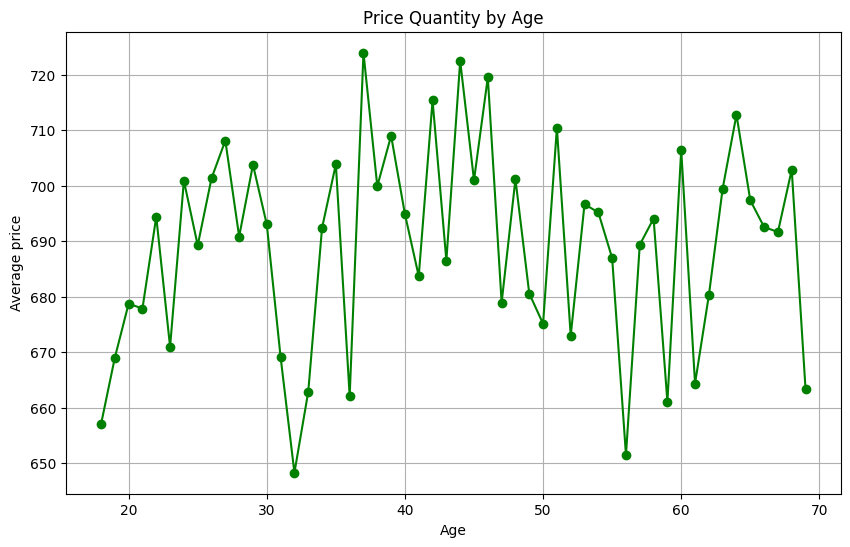

In [46]:
# age and price:
age_grouped = Shopping.groupby('age')['price'].mean().reset_index()
plt.figure(figsize=(10, 6))
plt.plot(age_grouped['age'], age_grouped['price'], marker='o', linestyle='-', color='g')
plt.title('Price Quantity by Age')
plt.xlabel('Age')
plt.ylabel('Average price')
plt.grid(True)
plt.show()
    

- Price & Category

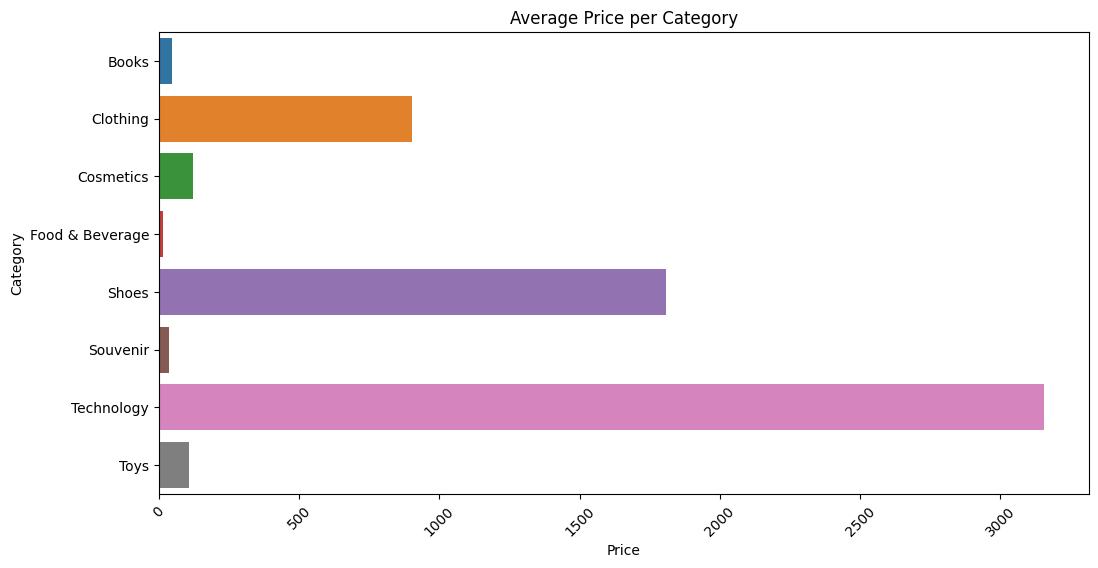

In [47]:
avg_price_per_category = Shopping.groupby('category')['price'].mean().reset_index()

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='price', y='category', data=avg_price_per_category)
plt.title('Average Price per Category')
plt.xlabel('Price')
plt.ylabel('Category')
plt.xticks(rotation=45)
plt.show()

- category and quantity

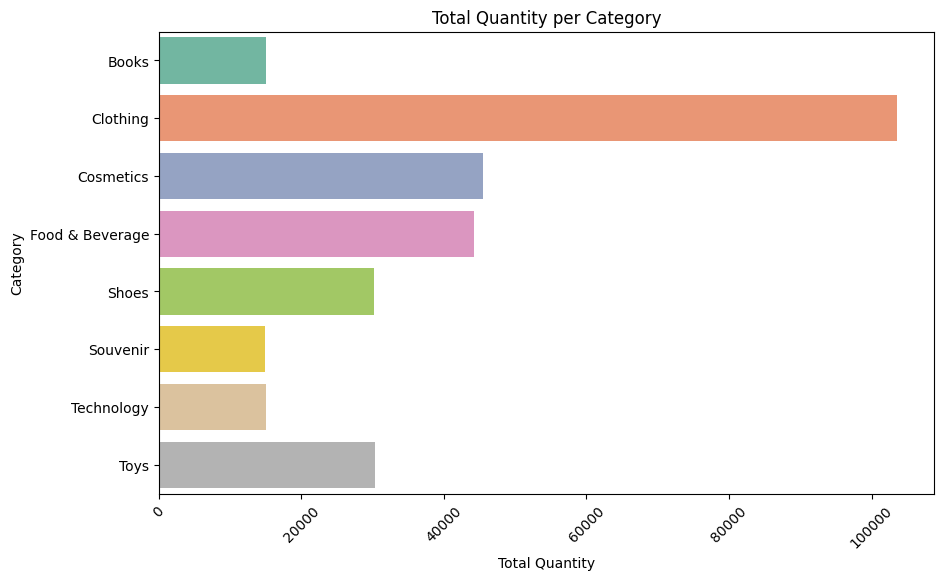

In [48]:
total_quantity_per_category = Shopping.groupby('category')['quantity'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='quantity', y='category', data=total_quantity_per_category, palette='Set2')
plt.title('Total Quantity per Category')
plt.xlabel('Total Quantity')
plt.ylabel('Category')
plt.xticks(rotation=45)
plt.show()

- Distribution of Categories by Shopping Mall

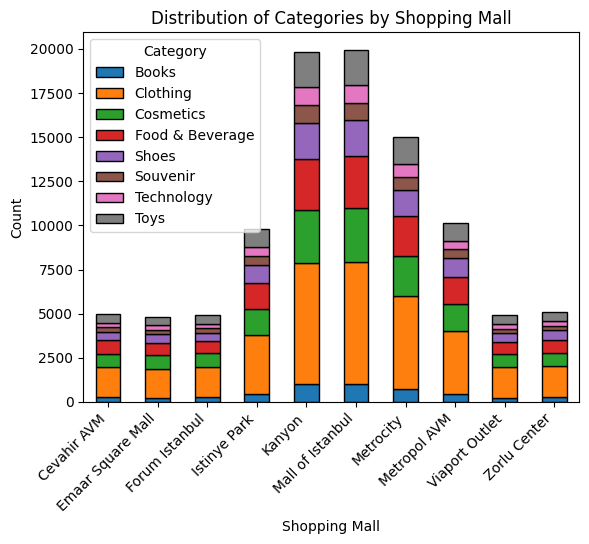

In [49]:
category_counts = Shopping.groupby(['shopping_mall', 'category']).size().unstack(fill_value=0)
category_counts.plot(kind='bar', stacked=True, edgecolor='black')
plt.title('Distribution of Categories by Shopping Mall')
plt.xlabel('Shopping Mall')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Category')
# plt.tight_layout()
plt.show()

- payment_method and quantity

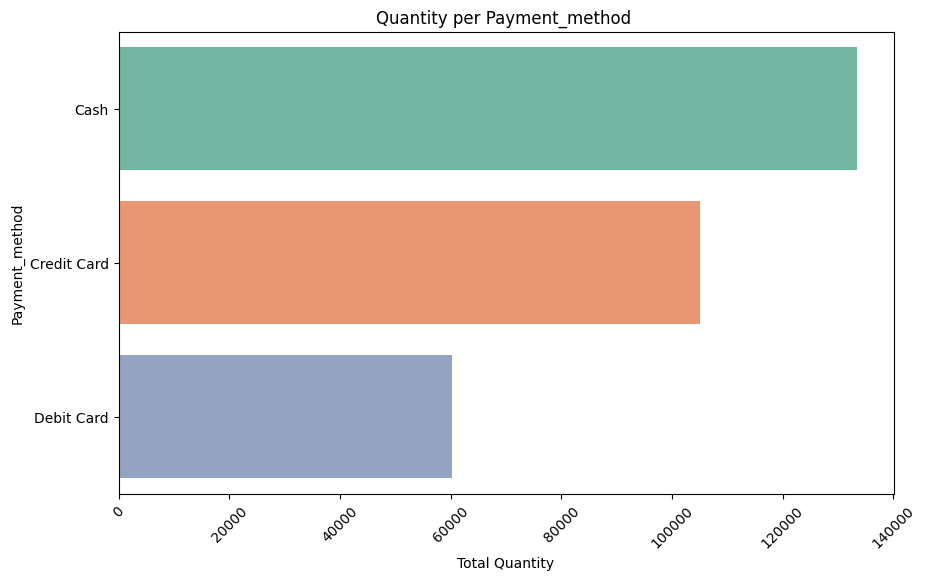

In [50]:
total_quantity_per_category = Shopping.groupby('payment_method')['quantity'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='quantity', y='payment_method', data=total_quantity_per_category, palette='Set2')
plt.title('Quantity per Payment_method ')
plt.xlabel('Total Quantity')
plt.ylabel('Payment_method')
plt.xticks(rotation=45)
plt.show()

- payment_method and price

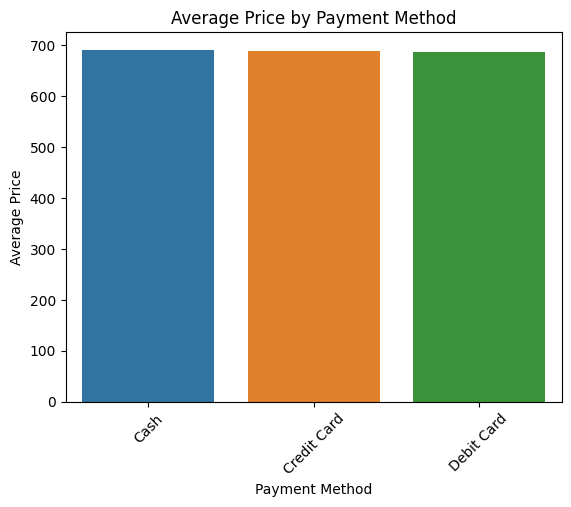

In [51]:
avg_price_per_method = Shopping.groupby('payment_method')['price'].mean().reset_index()

sns.barplot(x='payment_method', y='price', data=avg_price_per_method)
plt.title('Average Price by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()

## Date and Time
- invoice_date and quantity:

## Sales trend over year,month and day

In [52]:
crosstab_normalized=pd.crosstab(Shopping['quantity'],Shopping['Year'],normalize='columns')*100

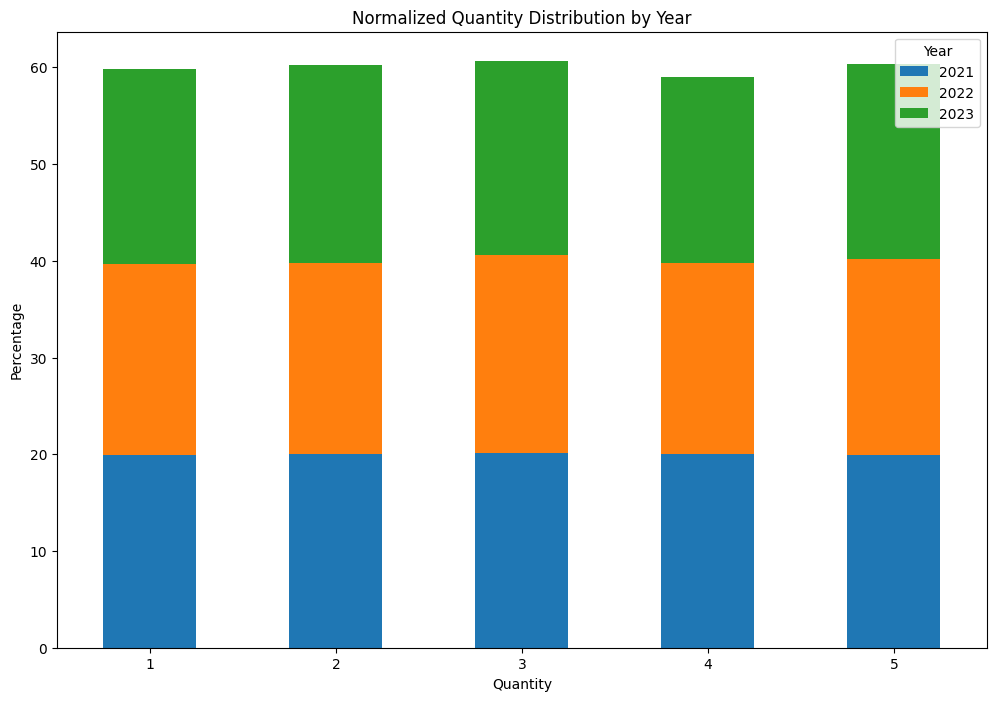

In [53]:
crosstab_normalized.plot(kind='bar', stacked=True, figsize=(12, 8))

plt.title('Normalized Quantity Distribution by Year')
plt.xlabel('Quantity')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.legend(title='Year')
plt.show()

In [54]:
crosstab_normalized=pd.crosstab(Shopping['Month'],Shopping['quantity'],normalize='columns')*100

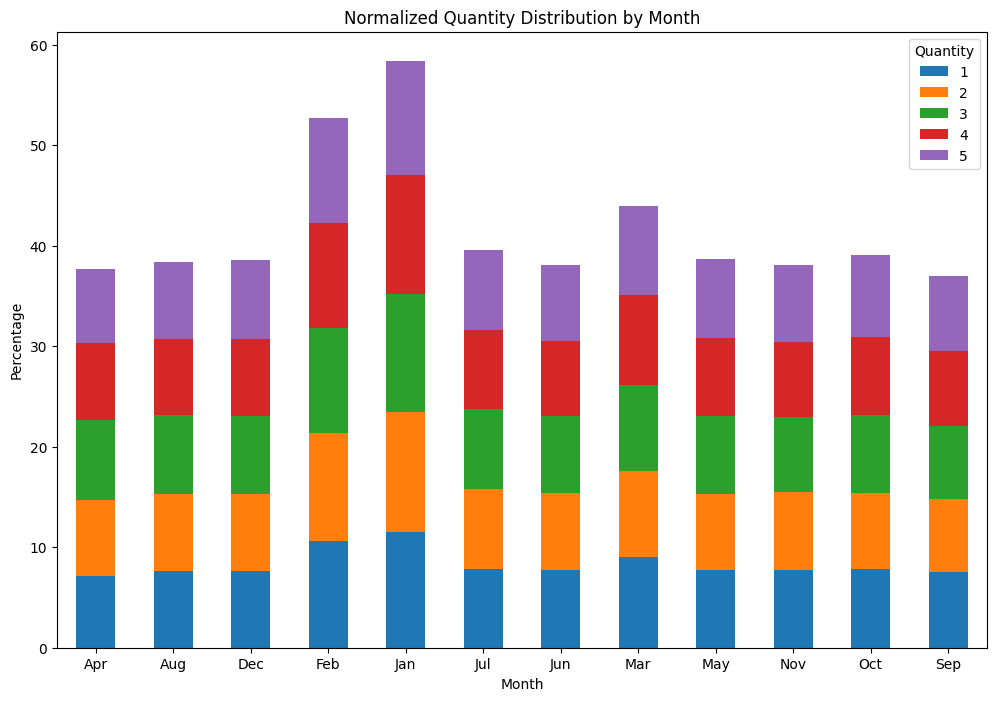

In [55]:
crosstab_normalized.plot(kind='bar', stacked=True, figsize=(12, 8))

plt.title('Normalized Quantity Distribution by Month')
plt.xlabel('Month')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.legend(title='Quantity')
plt.show()

In [56]:
crosstab=pd.crosstab(Shopping['Day'],Shopping['quantity'],normalize='columns')*100

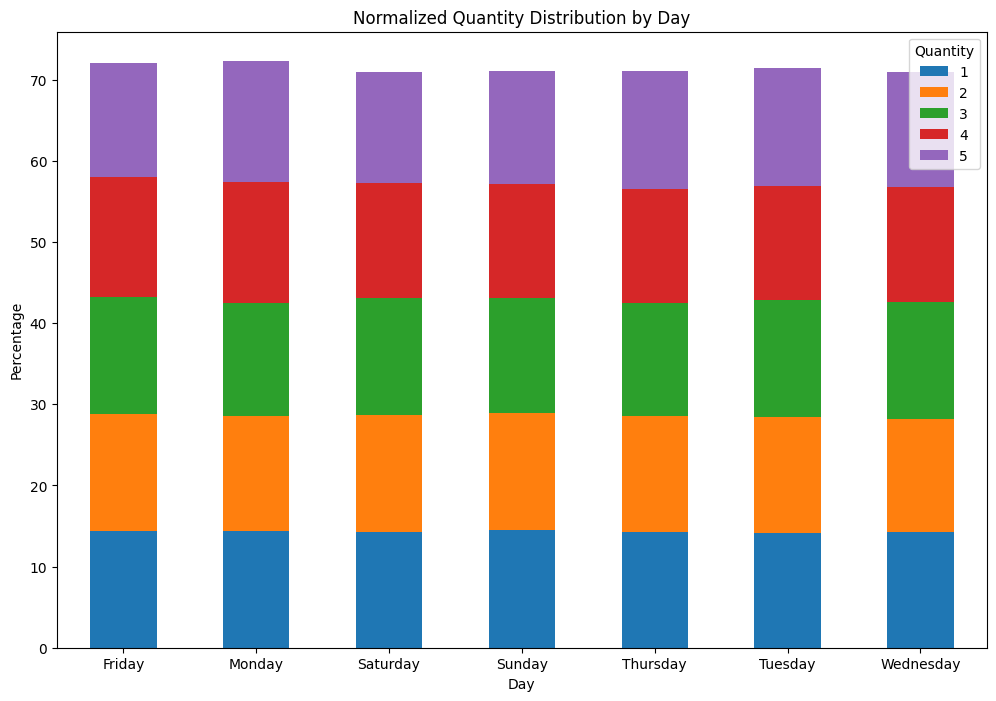

In [57]:
crosstab.plot(kind='bar', stacked=True, figsize=(12, 8))

plt.title('Normalized Quantity Distribution by Day')
plt.xlabel('Day')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.legend(title='Quantity')
plt.show()

## seasonal or time-based spending trends.

- Spending trends over Year,Month and Day

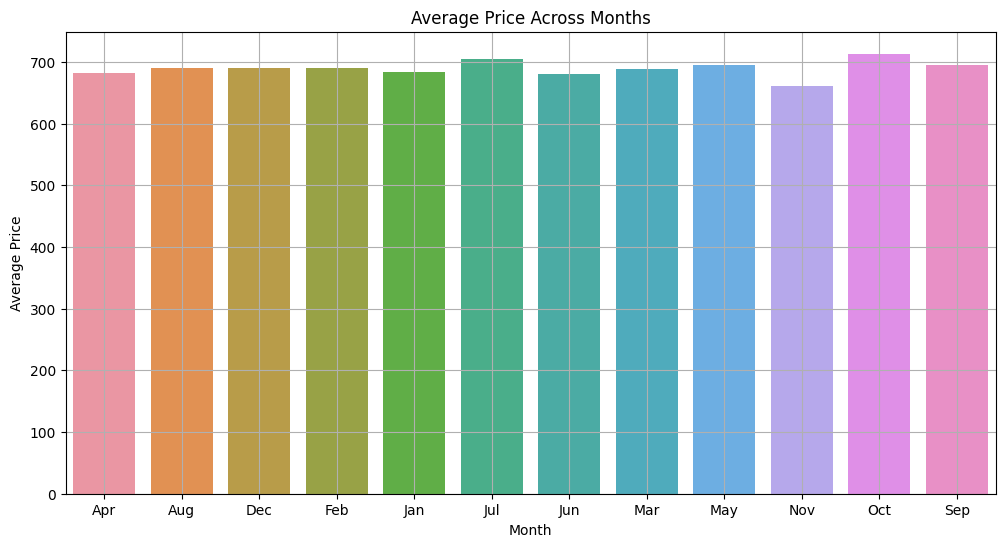

In [58]:
avg_price_per_year = Shopping.groupby('Month')['price'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='Month', y='price', data=avg_price_per_year)
plt.title('Average Price Across Months')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()

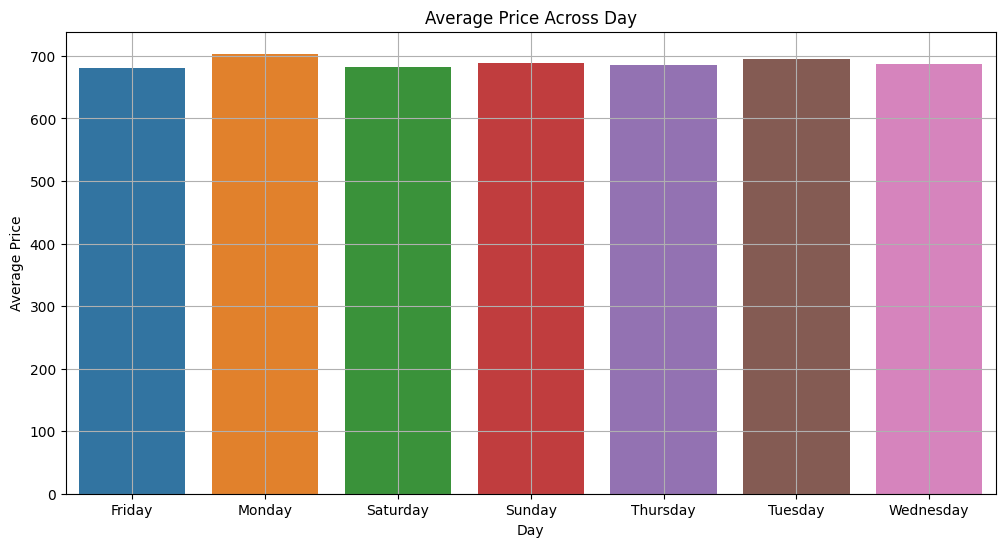

In [59]:
avg_price_per_year = Shopping.groupby('Day')['price'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='Day', y='price', data=avg_price_per_year)
plt.title('Average Price Across Day')
plt.xlabel('Day')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()

- Sales volumes across different shopping malls.

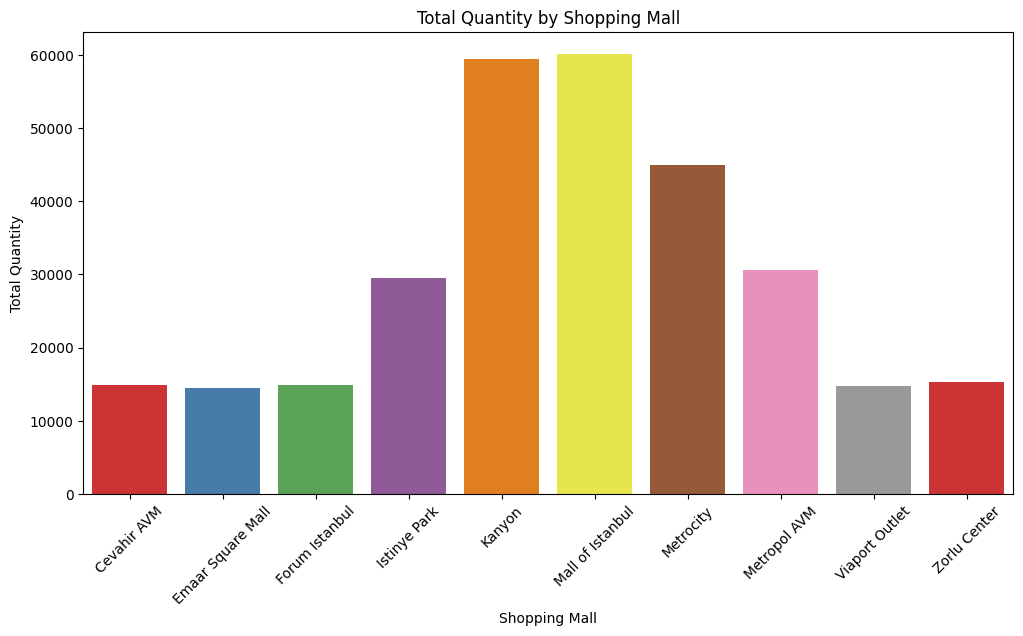

In [60]:
total_quantity_per_mall = Shopping.groupby('shopping_mall')['quantity'].sum().reset_index()

# Plotting the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='shopping_mall', y='quantity', data=total_quantity_per_mall, palette='Set1')
plt.title('Total Quantity by Shopping Mall')
plt.xlabel('Shopping Mall')
plt.ylabel('Total Quantity')
plt.xticks(rotation=45)
plt.show()

Spending behavior differs by shopping mall.

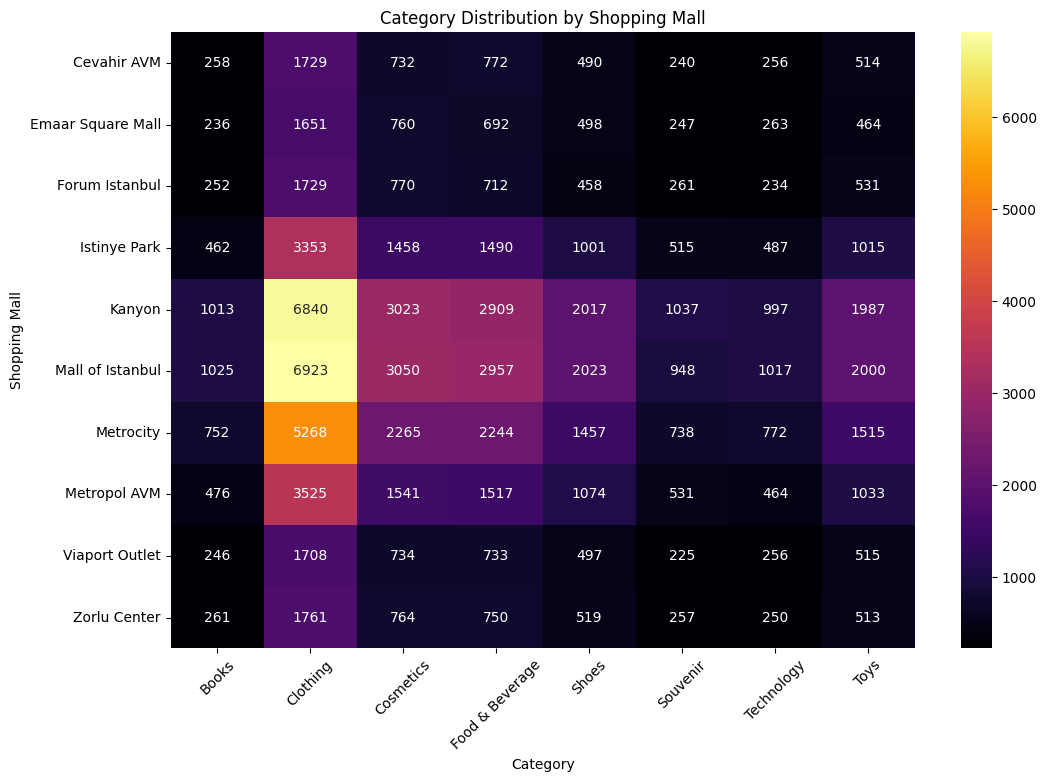

In [61]:
mall_category_crosstab = pd.crosstab(Shopping['shopping_mall'], Shopping['category'])
plt.figure(figsize=(12, 8))
sns.heatmap(mall_category_crosstab, cmap='inferno', annot=True, fmt='d')
plt.title('Category Distribution by Shopping Mall')
plt.xlabel('Category')
plt.ylabel('Shopping Mall')
plt.xticks(rotation=45)
plt.show()

- Price vs Age by Gender

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

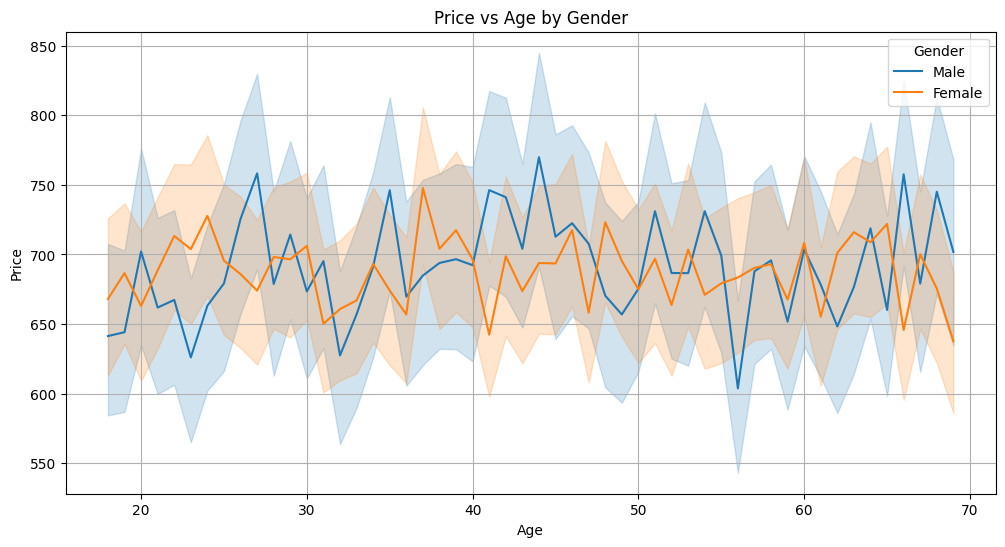

In [62]:
Shopping_sorted = Shopping.sort_values(by='age')
plt.figure(figsize=(12, 6))
sns.lineplot(x='age', y='price', hue='gender', data=Shopping_sorted)
plt.title('Price vs Age by Gender')
plt.xlabel('Age')
plt.ylabel('Price')
plt.grid(True)
plt.legend(title='Gender')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

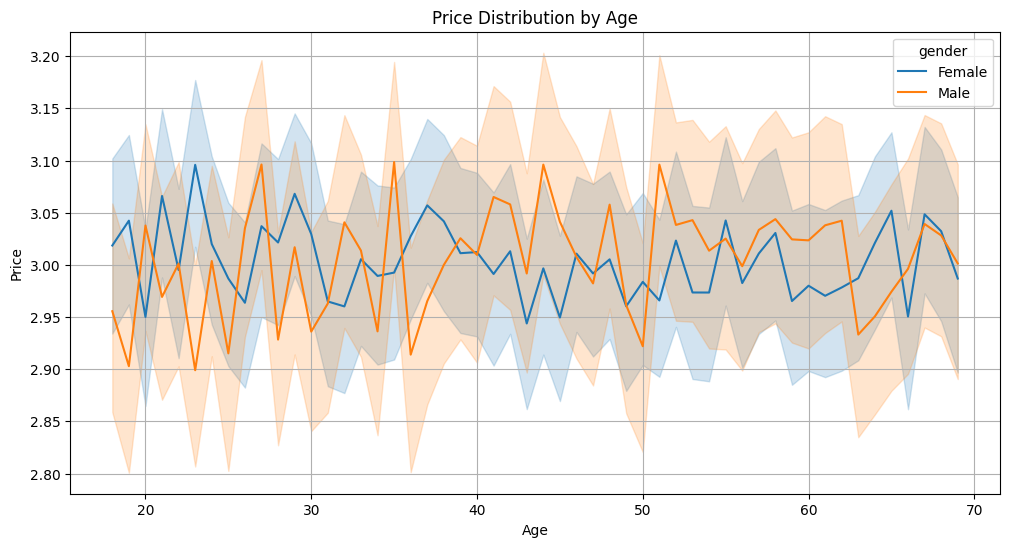

In [63]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='age', y='quantity', hue='gender', data=Shopping)
plt.title('Price Distribution by Age')
plt.xlabel('Age')
plt.ylabel('Price')
plt.grid(True)
plt.show()

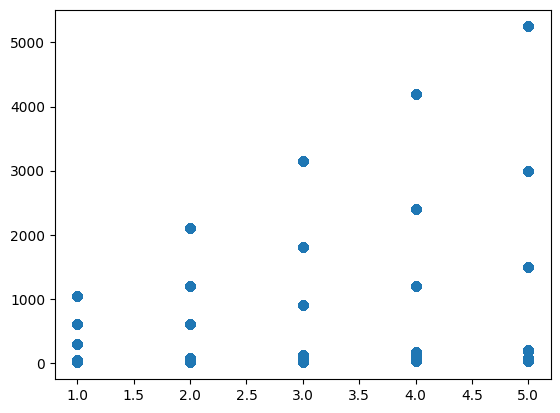

In [64]:
plt.scatter(data=Shopping,x='quantity',y='price')

- Just give no of clusters 

In [65]:
kmeans = KMeans(n_clusters=2)
predict= kmeans.fit_predict(Shopping[[ 'quantity', 'price']])
predict

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 1, 0, ..., 0, 1, 0], dtype=int32)

In [66]:
Shopping['Cluster']=predict


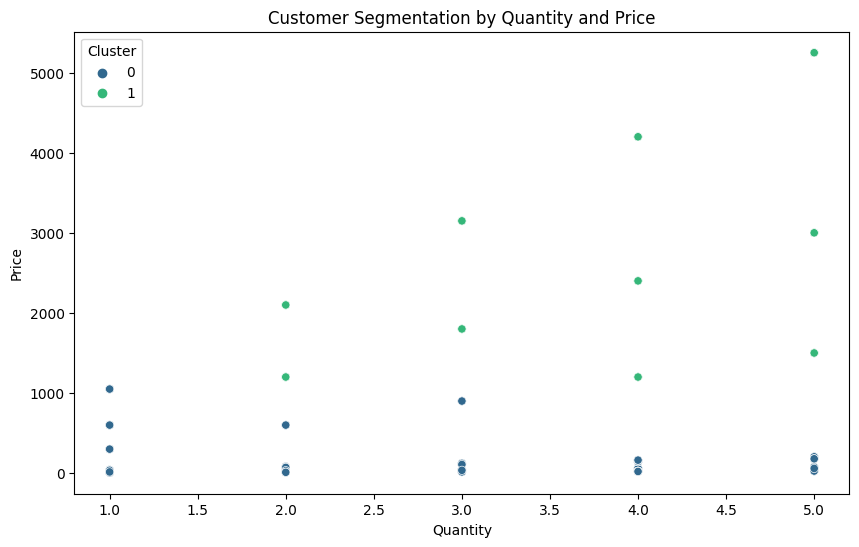

In [67]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=Shopping['quantity'], y=Shopping['price'], hue=Shopping['Cluster'], palette='viridis')
plt.title('Customer Segmentation by Quantity and Price')
plt.xlabel('Quantity')
plt.ylabel('Price')
plt.show()

In [68]:
price_data = Shopping['age'].values.reshape(-1, 1)
scaler = MinMaxScaler()
scaled_price = scaler.fit_transform(price_data)
Shopping['age'] = scaled_price
Shopping.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,Year,Month,Day,Cluster
0,I138884,C241288,Female,0.196078,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon,2022,Aug,Friday,1
1,I317333,C111565,Male,0.058824,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,2021,Dec,Sunday,1
2,I127801,C266599,Male,0.039216,Clothing,1,300.08,Cash,2021-11-09,Metrocity,2021,Nov,Tuesday,0
3,I173702,C988172,Female,0.941176,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM,2021,May,Sunday,1
4,I337046,C189076,Female,0.686275,Books,4,60.60,Cash,2021-10-24,Kanyon,2021,Oct,Sunday,0


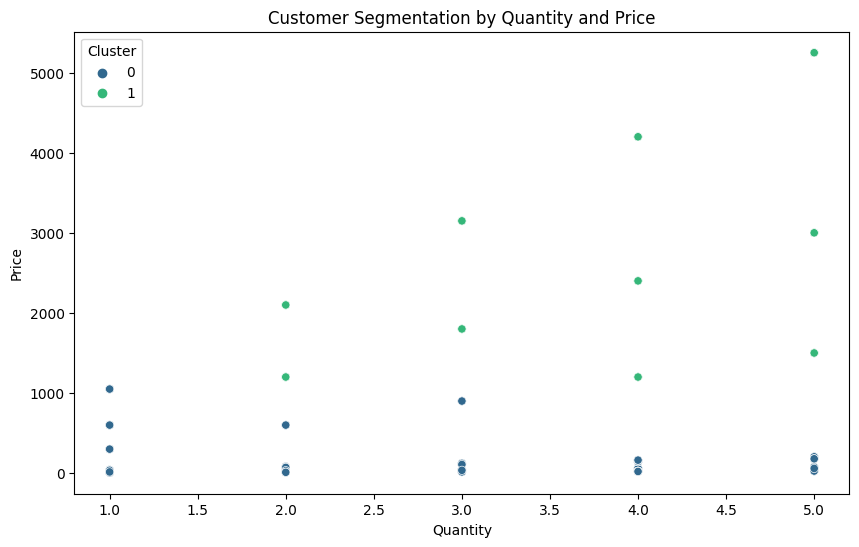

In [69]:

plt.figure(figsize=(10, 6))
sns.scatterplot(x=Shopping['quantity'], y=Shopping['price'], hue=Shopping['Cluster'], palette='viridis')
plt.title('Customer Segmentation by Quantity and Price')
plt.xlabel('Quantity')
plt.ylabel('Price')
plt.show()